<a href="https://colab.research.google.com/github/Louis5228/DLP-lab/blob/main/Lab1_back_propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

def derivative_sigmoid(x):
  return np.multiply(x, 1.0 - x)

def generate_linear(n = 100):
  pts = np.random.uniform(0, 1, (n, 2))
  inputs = []
  labels = []
  for pt in pts:
    inputs.append([pt[0], pt[1]])
    distance = (pt[0] - pt[1]) / 1.414
    if pt[0] > pt[1]:
      labels.append(0)
    else:
      labels.append(1)
  return np.array(inputs), np.array(labels).reshape(n, 1)

def generate_XOR_easy():
  inputs = []
  labels = []
  for i in range(11):
    inputs.append([0.1*i, 0.1*i])
    labels.append(0)

    if 0.1*i == 0.5:
      continue
    
    inputs.append([0.1*i, 1 - 0.1*i])
    labels.append(1)

  return np.array(inputs), np.array(labels).reshape(21, 1)

def show_result(x, y, pred_y):
  plt.figure(figsize=(12, 5))
  plt.subplot(121)
  plt.title("Ground truth", fontsize=18)
  for i in range(x.shape[0]):
    if y[i] == 0:
      plt.plot(x[i][0], x[i][1], 'ro')
    else:
      plt.plot(x[i][0], x[i][1], 'bo')
  
  plt.subplot(122)
  plt.title("Predict result", fontsize=18)
  for i in range(x.shape[0]):
    if pred_y[i] < 0.5:
      plt.plot(x[i][0], x[i][1], 'ro')
    else:
      plt.plot(x[i][0], x[i][1], 'bo')
  
  plt.show()

def plot_learning_curve(epochs, loss):
  plt.title('Learning curve', fontsize = 20)
  plt.xlabel('epochs', fontsize = 15)
  plt.ylabel('Loss', fontsize = 15)
  plt.plot(np.arange(1, epochs+1), loss, color='red')
  plt.grid(True)
  plt.show()

def MSE(y_pred, t):
  return np.mean((y_pred - t)**2)

def train(epochs, lr, x, t, w1, w2, w3):
  err_l = []
  for epoch in range(epochs):
    # Forward propagation
    z1 = sigmoid(x.dot(w1)) #n*4
    z2 = sigmoid(z1.dot(w2)) #n*4
    y_pred = sigmoid(z2.dot(w3)) #n*1
    
    err = MSE(y_pred, t)
    err_l.append(err)
    if epoch % 1000 == 0:
      print("epoch {:5d} loss : {:.15f}".format(epoch, err))

    # Back propagation
    err_grad = t - y_pred #n*1
    d_predict_output = err_grad * derivative_sigmoid(y_pred) #n*1
    d_hid2_output = d_predict_output.dot(w3.T) * derivative_sigmoid(z2) #n*4
    d_hid1_output = d_hid2_output.dot(w2) * derivative_sigmoid(z1) #n*4

    w3 += lr * z2.T.dot(d_predict_output) #4*1
    w2 += lr * z1.T.dot(d_hid2_output) # 4*4
    w1 += lr * x.T.dot(d_hid1_output) #2*4
  
  # Predict result
  print("\nTesting prediction:\n", y_pred)
  # Accuracy
  acc = np.count_nonzero((y_pred - t) < 0.02) / t.shape[0]
  print("\nAccuracy :", acc)
  show_result(x, t, y_pred)
  plot_learning_curve(epochs, err_l)

In [30]:
# Define number of neurons for each layer
input_Neurons = 2
hid1_Neurons = 4
hid2_Neurons = 4
output_Neurons = 1

## 1. Linear dataset

epoch     0 loss : 0.383521882286944
epoch  1000 loss : 0.232338295115257
epoch  2000 loss : 0.184150603299952
epoch  3000 loss : 0.029940901080740
epoch  4000 loss : 0.017510144374581
epoch  5000 loss : 0.013159772096453
epoch  6000 loss : 0.010590257486649
epoch  7000 loss : 0.008723479626954
epoch  8000 loss : 0.007271784766744
epoch  9000 loss : 0.006123401879979
epoch 10000 loss : 0.005209154763414
epoch 11000 loss : 0.004476104692846
epoch 12000 loss : 0.003882899368078
epoch 13000 loss : 0.003397875281997
epoch 14000 loss : 0.002997133438387
epoch 15000 loss : 0.002662700170233
epoch 16000 loss : 0.002381001532128
epoch 17000 loss : 0.002141697762281
epoch 18000 loss : 0.001936828361496
epoch 19000 loss : 0.001760195332025
epoch 20000 loss : 0.001606919484363
epoch 21000 loss : 0.001473119670464
epoch 22000 loss : 0.001355678771084
epoch 23000 loss : 0.001252071077707
epoch 24000 loss : 0.001160233463998
epoch 25000 loss : 0.001078468118592
epoch 26000 loss : 0.001005368291240
e

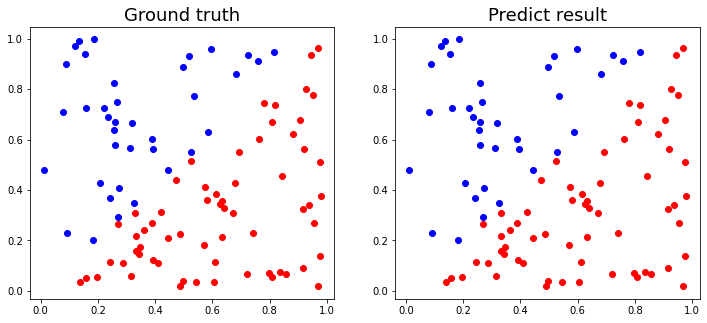

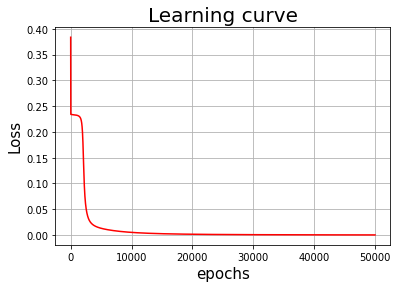

In [31]:
# Random weights initialization
w1 = np.random.uniform(size=(input_Neurons, hid1_Neurons))
w2 = np.random.uniform(size=(hid1_Neurons, hid2_Neurons))
w3 = np.random.uniform(size=(hid2_Neurons, output_Neurons))

# Define epochs and learning rate
epochs = 50000
lr = 0.01

x, t = generate_linear(n=100)
train(epochs, lr, x, t, w1, w2, w3)

## 2. XOR dataset

epoch     0 loss : 0.407508640060338
epoch  1000 loss : 0.249439715843531
epoch  2000 loss : 0.249421073376786
epoch  3000 loss : 0.249400921404908
epoch  4000 loss : 0.249378098178887
epoch  5000 loss : 0.249350971913657
epoch  6000 loss : 0.249316669078693
epoch  7000 loss : 0.249269174942631
epoch  8000 loss : 0.249193678868640
epoch  9000 loss : 0.249045205612083
epoch 10000 loss : 0.248635212401745
epoch 11000 loss : 0.246663713767889
epoch 12000 loss : 0.233496974542446
epoch 13000 loss : 0.161588103171700
epoch 14000 loss : 0.069364535446235
epoch 15000 loss : 0.042813329348166
epoch 16000 loss : 0.028582177814472
epoch 17000 loss : 0.018005056502422
epoch 18000 loss : 0.010890002173648
epoch 19000 loss : 0.006778579883588
epoch 20000 loss : 0.004493839989203
epoch 21000 loss : 0.003176106488765
epoch 22000 loss : 0.002368876150185
epoch 23000 loss : 0.001844098483960
epoch 24000 loss : 0.001484850245630
epoch 25000 loss : 0.001228053152481
epoch 26000 loss : 0.001037787481826
e

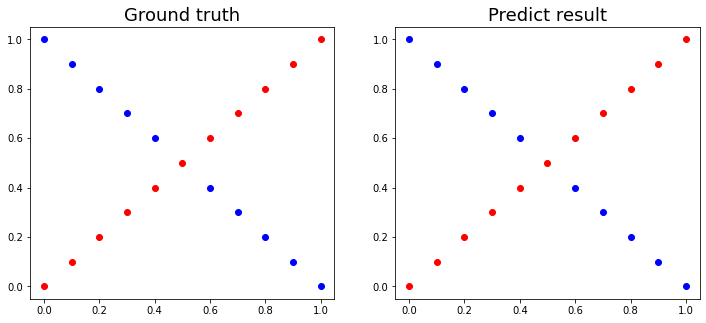

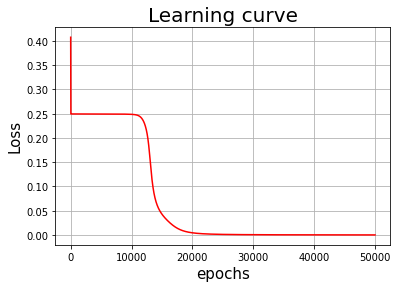

In [33]:
# Random weights initialization
w1 = np.random.uniform(size=(input_Neurons, hid1_Neurons))
w2 = np.random.uniform(size=(hid1_Neurons, hid2_Neurons))
w3 = np.random.uniform(size=(hid2_Neurons, output_Neurons))

# Define epochs and learning rate
epochs = 50000
lr = 0.05

x, t = generate_XOR_easy()
train(epochs, lr, x, t, w1, w2, w3)